Stephanie Leroux
2020-04-29

__!! work in progress !!__

### MAPS of the E-std of SSH s
* from the 3 20-members experiments i have so far:
    - GSL14: Stochastic STD of 1%, exp starting in Feb 2010
    - GSL15: Stochastic STD of 5%, exp starting in Feb 2010
    - GSL16: Stochastic STD of 1%, exp starting in Aug 2010
* The e-std was computed on JZ via ```cdfenstats```

---
## Modules

In [25]:
## standart libraries
import os,sys
import numpy as np

from scipy.signal import argrelmax
from scipy.stats import linregress

# xarray
import xarray as xr

# plot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cmocean

# Adekunle's PowerSPec module: https://github.com/adeajayi-kunle/PowerSpec
#import powerspec as ps
#import Plot_PowerSpec as pp

# custom tools
import lib_medwest60 as slx

%matplotlib inline 

---
## Read ESTATS files 
(computed from cdftool cdfenstat on JZ)

In [75]:
# READ
naexp="STD1%"
ens='ens01'
machine='CAL1'

diri='/mnt/meom/workdir/lerouste/MEDWEST60/'
dircoord ='/mnt/meom/workdir/lerouste/MEDWEST60/MEDWEST60-I/'

estd_GSL14 = xr.open_mfdataset(diri+'MEDWEST60-GSL14-S/ens01/1h/gridT-2D/'+'ESTATS_MEDWEST60-GSL14-ens01_1h_*_gridT-2D_*.nc')['stdev_sossheig']
estd_GSL15 = xr.open_mfdataset(diri+'MEDWEST60-GSL15-S/ens01/1h/gridT-2D/'+'ESTATS_MEDWEST60-GSL15-ens01_1h_*_gridT-2D_*.nc')['stdev_sossheig']
estd_GSL16 = xr.open_mfdataset(diri+'MEDWEST60-GSL16-S/ens01/1h/gridT-2D/'+'ESTATS_MEDWEST60-GSL16-ens01_1h_*_gridT-2D_*.nc')['stdev_sossheig']

nav_lon   = xr.open_dataset(dircoord+'MEDWEST60_coordinates_v3.nc4')['nav_lon']
nav_lat   = xr.open_dataset(dircoord+'MEDWEST60_coordinates_v3.nc4')['nav_lat']
maskmap   = xr.open_dataset(dircoord+'MEDWEST60_mask.nc4')['tmask'][0,0,:,:].squeeze()

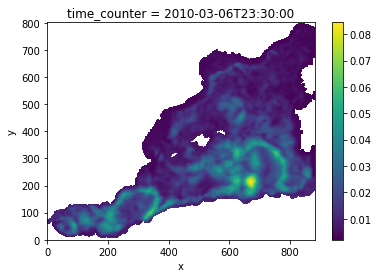

In [3]:
estd_GSL15.isel(time_counter=719).squeeze().where(maskmap>0).plot()

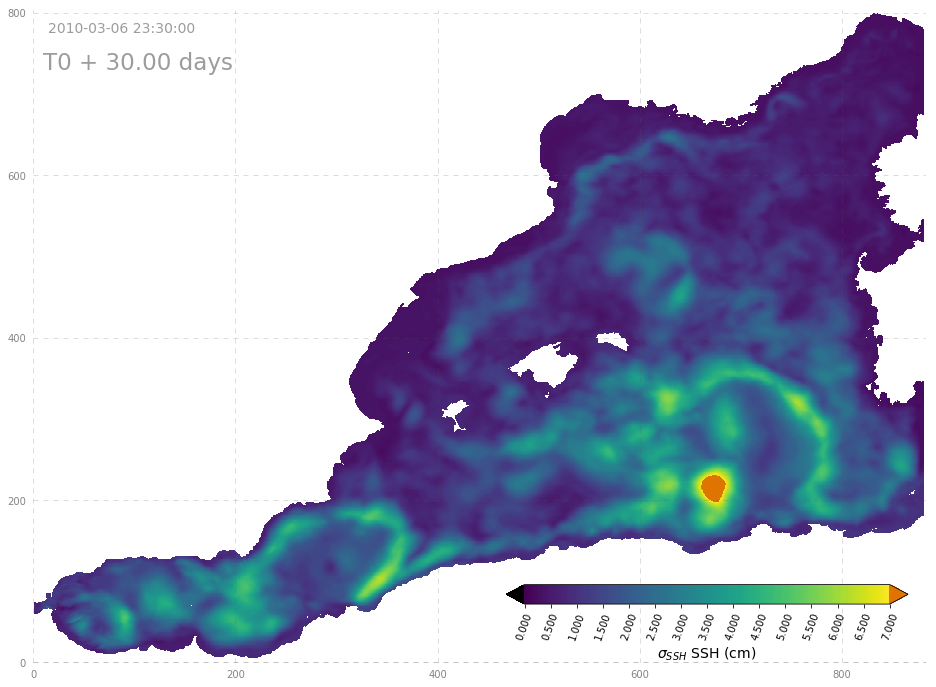

In [77]:
CONFIGCASE='MEDWEST60-GSL15'

gstyle='lightstyle'
varname='SSH'
latexvarname=slx.flatexvarname(varna)[1]
plto = varname+"_"+CONFIGCASE+"-"+ens+"estd"    

diro='/mnt/meom/workdir/lerouste/MEDWEST60/DIAGS/'

#### for it in range(0,SSH_el.time_counter.size-1):
#for it in range(10,11,6):
for it in range(719,720,6):  
#for it in range(100,359,6): 
    #====================================
    # data to plot 
    tdate=estd_GSL15.time_counter.to_index()[it]
    iday = (it+1)/24.
    tdelta="T0 + "+str('%.2f'%(iday))+" days"
    tformat="%.3f"
    
    # multiplicating factor
    fac=1e2

    if fac==1e3:
        faclabel='1e3'
        faclabelinv='10$^{-3}$'

    if fac==1:
        faclabel='1'
        faclabelinv=''

    if fac==1e2:
        faclabel='1e2'
        faclabelinv='10$^{-2}$'
        
    data2plot = estd_GSL15.isel(time_counter=it).squeeze().where(maskmap>0).to_masked_array()
    data2plot = data2plot*1e2                 
    
    
    namo = plto+'_'+str(it)+'.png'


    #========= Plot settings ===============
    #levbounds=[0,8.1,0.1]
    levbounds=[0,1.025,0.025]
    levbounds=[0,7.05,0.05]
    #levbounds=[0,0.505,0.005]
    # customed colormap
   
    cmap,norm = slx.mycolormap(levbounds,cm_base='viridis',cu='k',co='#DF7401')
    #cmocean.cm.thermal_r


    #========= PLOT ===============
    fig3,(ax) = plt.subplots(1, 1, figsize=[16, 12],facecolor='w')

    # main plot
    cs,ax = slx.plotmapMEDWEST_gp(fig3,ax,data2plot,cmap,norm,plto=plto,gridpts=True,gridptsgrid=True,gstyle=gstyle)
    #cs2   = ax.pcolormesh(data2plot2,cmap=cmap2,norm=norm2)
    lalpha=0.2
    lwidthgrid=1.
    gridinc=200
    lstylegrid=(0, (5, 5))
    if (gstyle=='lightstyle'):
            cmap.set_bad('w')
            lcolorgrid="#585858" # "#D8D8D8"
            tcolorgrid='#848484'#"#848484"            

    #ax = plt.gca()
    ax.xaxis.set_major_locator(mticker.MultipleLocator(gridinc))
    ax.yaxis.set_major_locator(mticker.MultipleLocator(gridinc))   
    ax.tick_params(axis='x', colors=tcolorgrid)
    ax.tick_params(axis='y', colors=tcolorgrid)
    ax.grid(which='major',linestyle=lstylegrid,color=lcolorgrid,alpha=lalpha,linewidth=lwidthgrid)
    ax.axhline(y=1.,xmin=0, xmax=883,zorder=10,color=lcolorgrid,linewidth=lwidthgrid,linestyle=lstylegrid,alpha=lalpha )
    
    # add date
    tcolordate="848484"
    tsizedate=14
    
    ax.annotate(tdate,xy=(15,775),xycoords='data', color=tcolordate,size=tsizedate)
    plt.axhline(y=350.,xmin=200, xmax=400,zorder=10,color='r',linewidth=3,linestyle='-',alpha=1 )
    #plt.annotate(tdelta,xy=(15,750),xycoords='data', color=tcolordate,size=tsizedate)
    plt.annotate(tdelta,xy=(10,730),xycoords='data', color=tcolordate,size=23)
       
    
    # add colorbar
    cbon=True
    if cbon:
        tlabel="$\sigma_{SSH}$ "+latexvarname+slx.textunitfac(varname,faclabelinv)
        cb = slx.addcolorbar(fig3,cs,ax,levbounds,levincr=10,tformat="%.3f",
                             tlabel=tlabel,facmul=1,orientation='horizontal',tc='k',
                            bbta=(0.08, -0.08,0.9,0.2))
    
                                       
        
    
    #plt.figimage(ON_res , 700, 630, zorder=10,alpha=1) 
    
    # display only once
    #if it==10:
    #    plt.show()
    plt.show()
         
    # Save fig in png, resolution dpi    
    slx.saveplt(fig3,diro,namo,dpifig=300)
    plt.close(fig3)